In [6]:
import csv
import pandas as pd

In [7]:
filename = "LoL_Data_2022.csv"
df = pd.read_csv(filename,error_bad_lines=False, index_col=False, dtype='unicode')
print("done")

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7848\3953943360.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename,error_bad_lines=False, index_col=False, dtype='unicode')


done


In [30]:
print(df.head(25)[['playername','result','kills','deaths','dpm','total cs']])

   playername result kills deaths        dpm total cs
0      Soboro      0     2      3   552.2942      231
1      Raptor      0     2      5   412.0841      148
2      Feisty      0     2      2   499.4046      193
3       Gamin      0     2      4   389.0018      226
4       Loopy      0     1      5   128.3012       42
5        DnDn      1     1      1   611.3835      229
6      Sylvie      1     4      1   370.0175      183
7      FIESTA      1     6      3   724.6935      216
8       vital      1     8      2   934.7461      319
9    Blessing      1     0      2   158.1786       29
10        NaN      0     9     19  1981.0858      NaN
11        NaN      1    19      9  2799.0193      NaN
12     Photon      0     0      5   269.1769      245
13     Forest      0     1      2   242.0719      215
14     TolanD      0     2      4   655.1183      371
15    Trigger      0     0      2   431.0407      334
16     Kabbie      0     0      3    93.5762       44
17    Meaning      1     2  

In [39]:
df = df.dropna(subset='playername')

In [40]:
print(df.head(25)[['playername','position','result','kills','deaths','dpm','total cs']])

   playername position result kills deaths       dpm total cs
0      Soboro      top      0     2      3  552.2942      231
1      Raptor      jng      0     2      5  412.0841      148
2      Feisty      mid      0     2      2  499.4046      193
3       Gamin      bot      0     2      4  389.0018      226
4       Loopy      sup      0     1      5  128.3012       42
5        DnDn      top      1     1      1  611.3835      229
6      Sylvie      jng      1     4      1  370.0175      183
7      FIESTA      mid      1     6      3  724.6935      216
8       vital      bot      1     8      2  934.7461      319
9    Blessing      sup      1     0      2  158.1786       29
12     Photon      top      0     0      5  269.1769      245
13     Forest      jng      0     1      2  242.0719      215
14     TolanD      mid      0     2      4  655.1183      371
15    Trigger      bot      0     0      2  431.0407      334
16     Kabbie      sup      0     0      3   93.5762       44
17    Me

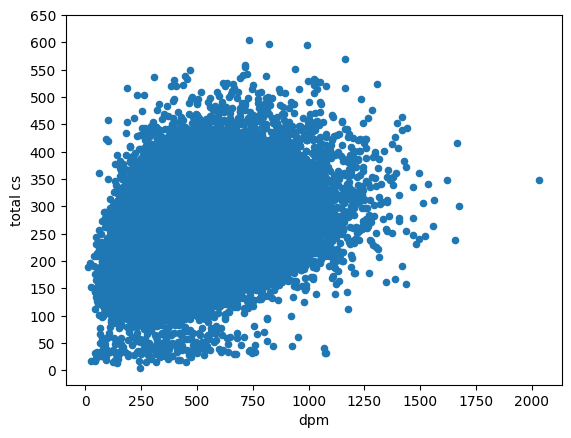

In [111]:
subdf = df[['position','dpm','total cs']]
subdf = subdf[subdf['position'] != "sup"]
subdf = subdf.dropna(subset='total cs')
subdf = subdf.dropna(subset='dpm')
#subdf.sort_values(['kills','total cs'],ascending=True,inplace=True)
subdf['dpm'] = subdf['dpm'].astype(float)
subdf['total cs'] = subdf['total cs'].astype(int)
small_subdf = subdf.head(50000)
graph = small_subdf.plot(kind="scatter", x='dpm', y='total cs',yticks=range(0,700,50))

Text(0.5, 1.0, 'Test Train Split')

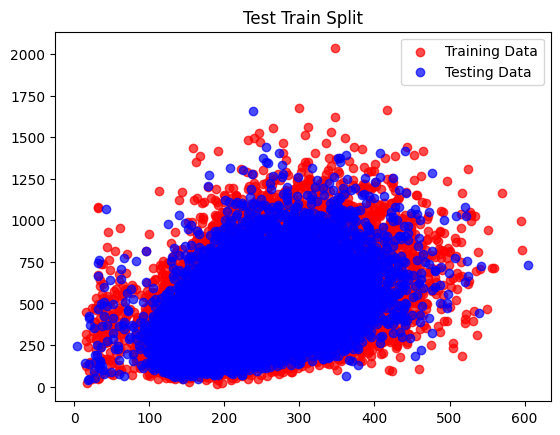

In [112]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(small_subdf['total cs'], small_subdf['dpm'])

plt.scatter(x_train, y_train, label="Training Data", color='r', alpha = 0.7)
plt.scatter(x_test, y_test, label="Testing Data", color='b', alpha = 0.7)
plt.legend()
plt.title("Test Train Split")

In [113]:
from sklearn.linear_model import LinearRegression

trained_model= LinearRegression()
trained_model.fit(x_train.values.reshape(-1,1), y_train.values)

predictions = trained_model.predict(x_test.values.reshape(-1,1))

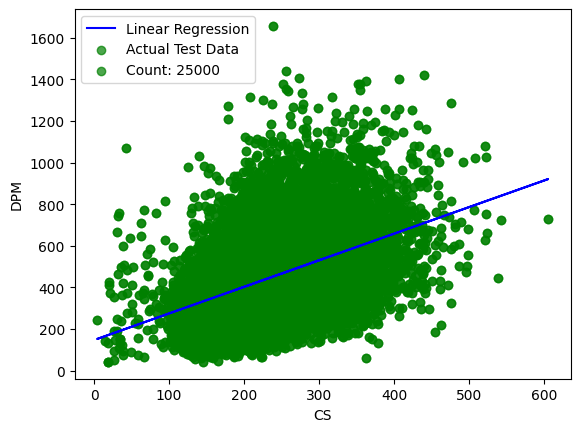

In [114]:
plt.plot(x_test, predictions, label = "Linear Regression", color="b")
plt.scatter(x_test, y_test, label = "Actual Test Data", color="g", alpha = 0.7)
plt.scatter(x_test, y_test, label = "Count: " + str(len(x_test) + len(y_test)), color="g", alpha = 0.7)
plt.xlabel("CS")
plt.ylabel("DPM")
plt.legend()
plt.show() #ML model to predict how much dpm you have based on ur cs

In [115]:
trained_model.score(x_test.values.reshape(-1,1), y_test.values)

0.2027362635756602

In [116]:
import numpy as np
trained_model.predict(np.array([[220]]))[0]

428.32286200745506

<Axes: xlabel='side', ylabel='result'>

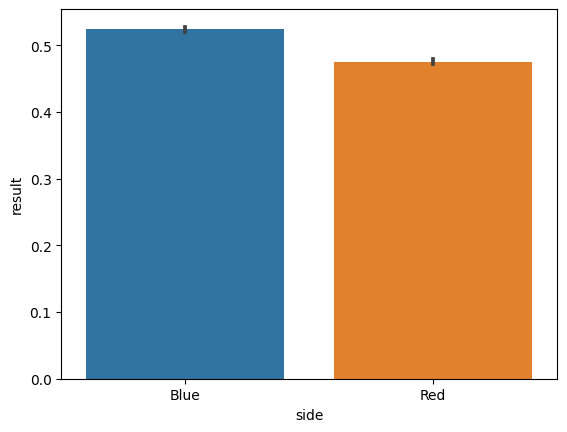

In [141]:
import seaborn as sns
subdf2 = df[["result", "side"]]
subdf2 = subdf2.dropna(how="any")
subdf2["result"] = subdf2["result"].astype(int)

sns.barplot(x = subdf2["side"], y=subdf2["result"]) #which side wins more